# Домашня робота №10

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [2]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
x_train_full = x_train_full[..., np.newaxis] / 255.0 
x_test = x_test[..., np.newaxis] / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=101)


In [36]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    Dropout(0.1),
    Dense(10, activation='softmax')
])


In [ ]:
initial_learning_rate = 0.001

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_val, y_val))

# Оцінка моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Точність на тестовому наборі: {test_accuracy * 100:.2f}%")

Epoch 1/20
750/750 [==============================] - 27s 35ms/step - loss: 1.4102 - accuracy: 0.7708 - val_loss: 0.6686 - val_accuracy: 0.8238
Epoch 2/20
750/750 [==============================] - 29s 38ms/step - loss: 0.5973 - accuracy: 0.8427 - val_loss: 0.5345 - val_accuracy: 0.8634
Epoch 3/20
750/750 [==============================] - 27s 36ms/step - loss: 0.5248 - accuracy: 0.8652 - val_loss: 0.5288 - val_accuracy: 0.8621
Epoch 4/20
750/750 [==============================] - 26s 35ms/step - loss: 0.4820 - accuracy: 0.8763 - val_loss: 0.4776 - val_accuracy: 0.8776
Epoch 5/20
750/750 [==============================] - 27s 36ms/step - loss: 0.4517 - accuracy: 0.8835 - val_loss: 0.4350 - val_accuracy: 0.8861
Epoch 6/20
750/750 [==============================] - 26s 35ms/step - loss: 0.4322 - accuracy: 0.8905 - val_loss: 0.4393 - val_accuracy: 0.8836
Epoch 7/20
750/750 [==============================] - 27s 36ms/step - loss: 0.4110 - accuracy: 0.8965 - val_loss: 0.4351 - val_accuracy:

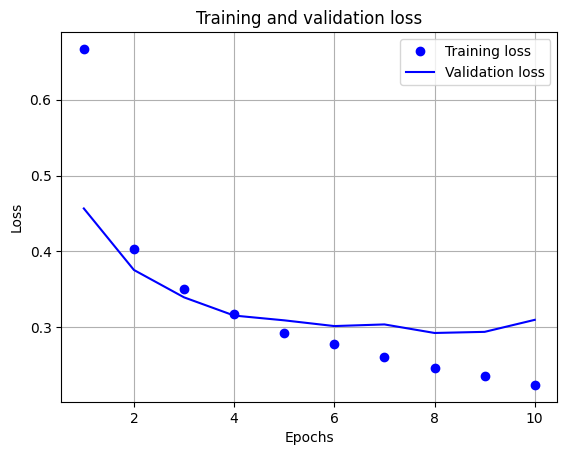

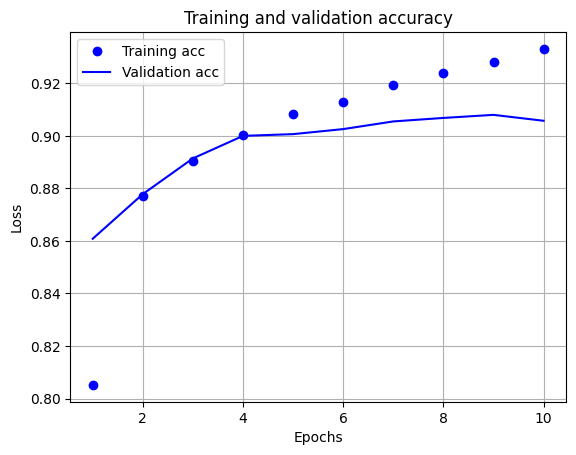

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
